In [1]:
from keras.layers import Input, Dense
from keras.models import Model

e:\programdata\anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [3]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [4]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

print(autoencoder.layers)
print(autoencoder.layers[-1])

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

[<keras.engine.topology.InputLayer object at 0x00000211A5F93710>, <keras.layers.core.Dense object at 0x00000211A5F936A0>, <keras.layers.core.Dense object at 0x00000211A5F93AC8>]


In [5]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [6]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()


x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print( x_train.shape )
print( x_test.shape )

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 96us/step - loss: 0.3486 - val_loss: 0.2711
Epoch 2/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.2641 - val_loss: 0.2532
Epoch 3/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.2417 - val_loss: 0.2284
Epoch 4/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.2202 - val_loss: 0.2100
Epoch 5/50
60000/60000 [==============================] - 1s 14us/step - loss: 0.2047 - val_loss: 0.1970
Epoch 6/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.1934 - val_loss: 0.1873
Epoch 7/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.1847 - val_loss: 0.1794
Epoch 8/50
60000/60000 [==============================] - 1s 15us/step - loss: 0.1777 - val_loss: 0.1732
Epoch 9/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1719 - val_loss: 0.1678
Epoch

In [8]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

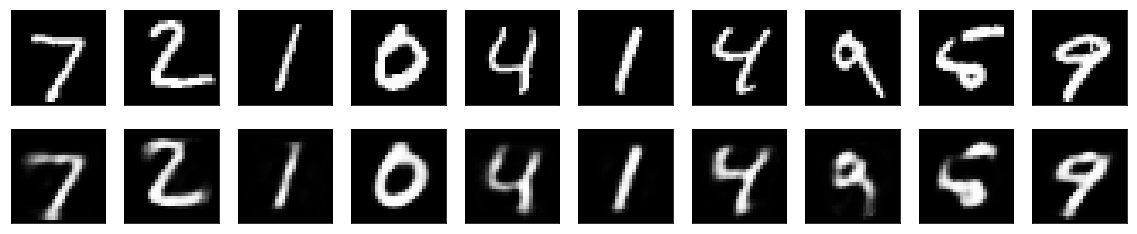

In [9]:
%matplotlib inline
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
print(encoded_imgs[0].shape)
print(x_test[0].shape)

(32,)
(784,)


In [11]:
print(encoded_imgs[0])

[ 1.6152387  3.8365889  4.32534    0.         0.         5.289687
  1.0481155  2.476152   5.57485    8.557541   5.2032766  2.2832236
  6.531291   3.8171186  7.126665   7.2530174  1.5801309  2.7958288
  5.8410883  9.795509   0.         7.5489717  9.025557   5.972252
  7.2176456 12.686979   4.9093556  6.7589335  2.902245   3.7885175
  9.753432  17.902544 ]


In [12]:
print(encoded_imgs.mean())

7.450764
